<a href="https://colab.research.google.com/github/erikjamesmason/ECE_DataCommons/blob/main/ECE_Sector_Plan_Update_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE Sector Plan Update

Every year, the American Community Survey (published by the US Census) reports thousands of variables about demographics, economics, housing, and more. This information, stored in Data Commons, is available to everyone for data science projects, education, and exploration. This Notebook utilizes (1) the [browser](https://browser.datacommons.org/) and (2) the [Pandas API](https://github.com/datacommonsorg/api-pandas).

## What is Data Commons? 
#####*- from DataCommons.org*

Data Commons is an open knowledge repository that combines data from public datasets using mapped common entities. It contains statements about real world objects such as

* [Klackamas County](https://datacommons.org/browser/geoId/41005) is contained in the [State of Oregon](https://datacommons.org/browser/geoId/41)
* The latitude of [Berkeley, CA](https://browser.datacommons.org/kg?dcid=geoId/0606000) is 37.8703
* [The population of Oregon](https://datacommons.org/browser/geoId/41) was [4.22M in 2018](https://datacommons.org/browser/dc/o/pbmxc9lvd3yl1).

In the graph, [*entities*](https://en.wikipedia.org/wiki/Entity) like [Santa Clara County](https://browser.datacommons.org/kg?dcid=geoId/06085) are represented by nodes. Every node has a type corresponding to what the node represents. For example, [California](https://browser.datacommons.org/kg?dcid=geoId/06) is a [State](https://schema.org/State). *Relations* between entities are represented by edges between these nodes. For example, the statement "Santa Clara County is contained in the State of California" is represented in the graph as two nodes: "Santa Clara County" and "California" with an edge labeled "[containedInPlace](https://schema.org/containedInPlace)" pointing from Santa Clara to California. Data Commons closely follows the [Schema.org data model](https://schema.org/docs/datamodel.html) and leverages Schema.org schema to provide a common set of types and properties.

## Data Commons Browser

The [Data Commons browser](https://browser.datacommons.org/) provides a way to explore the data in a human-readable format. It is the best way to explore what is in Data Commons. Searching in the browser for an entity like [Mountain View](https://browser.datacommons.org/kg?dcid=geoId/0649670), takes you to a page about the entity, including properties like [containedInPlace](https://browser.datacommons.org/kg?dcid=containedInPlace) and [timezone](https://browser.datacommons.org/kg?dcid=timezone).

An important property for all entities is the **`dcid`**. The `dcid` (Data Commons identifier) is a unique identifier assigned to each entity in the knowledge graph. With this identifier, you will be able to search for and query information on the given entity in ways that we will discuss later. The `dcid` is listed at the top of the page next to "About: " and also in the list of properties.

## Pandas API

The [Pandas API](https://github.com/datacommonsorg/api-pandas) provides functions for users to extract structured information from Data Commons programmatically and view them in different formats such as Python `dict`s and [pandas](https://pandas.pydata.org/) DataFrames. DataFrames allow access to all the data processing, analytical and visualization tools provided by packages such as pandas, NumPy, SciPy, and Matplotlib.


In [1]:
# Install datacommons_pandas
!pip install datacommons_pandas --upgrade --quiet
# Import Data Commons
import datacommons_pandas as dc

# Import other required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

import json

     |████████████████████████████████| 45 kB 1.7 MB/s 


## Initial Data Setup Example

In [3]:
# In the browser, we saw that the dcid for United States is country/USA

# store as string
usa = 'country/USA'

### Using `get_places_in` to Query Administrative Areas

The Pandas API defines a number of convenience functions for building Pandas dataframes with information in the datacommons graph. We will be using **`get_places_in`** which requires three arguments:

- `dcids` - A list or `pandas.Series` of dcids identifying administrative areas that we wish to get containing places for.
- `place_type` - The type of the administrative area that we wish to query for.

In Data Commons, the 'containedInPlace' property relates administrative areas to its containing administrative areas. Concretely, every US 'State' node has a directed edge to the USA 'Country' node where the name of this edge is 'containedInPlace'. The same also goes for 'County' to 'State' nodes and 'City' to 'County'.

In [4]:
# Get lists of states, counties, and cities within the United States, respectively.
states = dc.get_places_in([usa], 'State')[usa]

counties = dc.get_places_in([usa], 'County')[usa]
cities = dc.get_places_in([usa], 'City')[usa]

Let's see what states are in the USA:

In [5]:
# Display the first 10 states
states[:10]

['geoId/01',
 'geoId/02',
 'geoId/04',
 'geoId/05',
 'geoId/06',
 'geoId/08',
 'geoId/09',
 'geoId/10',
 'geoId/11',
 'geoId/12']

### Initial Data Query

**Note** - This query may take a minute!


In [ ]:
# Get StatVarObservations for states.
df_state = dc.build_multivariate_dataframe(states, ['Count_Person'])

# Get StatVarObservations for counties.
df_county = dc.build_multivariate_dataframe(counties, ['Count_Person'])
# Get StatVarObservations for cities.
df_city = dc.build_multivariate_dataframe(cities, ['Count_Person'])


View the Query

In [ ]:
# View the first 5 rows of the state table.
df_state.head(5)

,Count_Person
place,
geoId/01,5024279
geoId/02,733391
geoId/04,7151502
geoId/05,3011524
geoId/06,39538223


To get the name of places, we can use the `get_property_values` function:

In [ ]:
def add_name_col(df):
  # Add a new column called name, where each value is the name for the place dcid in the index.
  df['name'] = df.index.map(dc.get_property_values(df.index, 'name'))
  
  # Keep just the first name, instead of a list of all names.
  df['name'] = df['name'].str[0]


In [ ]:
df_state.index[0]

'geoId/01'

In [ ]:
add_name_col(df_state)
df_state.head()

,Count_Person,name
place,,
geoId/01,5024279,Alabama
geoId/02,733391,Alaska
geoId/04,7151502,Arizona
geoId/05,3011524,Arkansas
geoId/06,39538223,California


## Oregon-based Data Commons graph

We need to specify Oregon then we can work our way into Central Oregon data from there

In [ ]:
# retreive Oregon geo ID
df_state.loc[df_state.name=='Oregon']

,Count_Person,name
place,,
geoId/41,4237256,Oregon


In [ ]:
# Get counties that only contain Oregon Geo ID: 41
oregon_counties = df_county.loc[df_county.index.str.contains('geoId/41')]

In [ ]:
add_name_col(oregon_counties)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From here, we can specify which counties we want to view. *However*, we will likely want to review the **cities** or **postal/zip** codes to ensure we are not missing specific areas.

In [ ]:
central_oregon = oregon_counties[oregon_counties['name'].isin(['Deschutes County', 'Jefferson County', 'Crook County'])]

In [ ]:
central_oregon

,Count_Person,name
place,,
geoId/41013,24738,Crook County
geoId/41017,198253,Deschutes County
geoId/41031,24502,Jefferson County


In [ ]:
dc.build_multivariate_dataframe(central_oregon.index, ["Count_Person_Upto18Years"]).sum()

Count_Person_Upto18Years    49962
dtype: int64

## Explore the geographic boundaries in Counties DataFrame

Looking up each individual geographic boundary GeoID would require manual effort and time - We can use the Data Commons Pandas API method ```get_places_in()``` to help explore what cities are available in our Central Oregon Counties subset

In [ ]:
# the Data Commons (dc) method *get_places_in* will return a Python dictionary
CO_cities = dc.get_places_in(central_oregon.index, "City")
CO_cities

{'geoId/41013': ['geoId/4159850'],
 'geoId/41017': ['geoId/4105800',
  'geoId/4106650',
  'geoId/4116975',
  'geoId/4119020',
  'geoId/4121450',
  'geoId/4141050',
  'geoId/4160070',
  'geoId/4161200',
  'geoId/4166385',
  'geoId/4167950',
  'geoId/4171250',
  'geoId/4172800',
  'geoId/4172820',
  'geoId/4173225',
  'geoId/4175050',
  'wikidataId/Q3459533',
  'wikidataId/Q7852476'],
 'geoId/41031': ['geoId/4110550',
  'geoId/4116975',
  'geoId/4117300',
  'geoId/4142250',
  'geoId/4145250',
  'geoId/4147750',
  'geoId/4178600',
  'wikidataId/Q3459574']}

In [ ]:
CO_cities.get("geoId/41013")

['geoId/4159850']

In [ ]:
dc.get_property_values(CO_cities.get("geoId/41013"),'name')

{'geoId/4159850': ['Prineville']}

In [ ]:
cities_list = []
for k,v in CO_cities.items():
  print(k)
  print(v)
  print(dc.get_property_values(CO_cities.get(k),'name'))
  cities_list.extend(v)


geoId/41013
['geoId/4159850']
{'geoId/4159850': ['Prineville']}
geoId/41017
['geoId/4105800', 'geoId/4106650', 'geoId/4116975', 'geoId/4119020', 'geoId/4121450', 'geoId/4141050', 'geoId/4160070', 'geoId/4161200', 'geoId/4166385', 'geoId/4167950', 'geoId/4171250', 'geoId/4172800', 'geoId/4172820', 'geoId/4173225', 'geoId/4175050', 'wikidataId/Q3459533', 'wikidataId/Q7852476']
{'geoId/4105800': ['Bend'], 'geoId/4106650': ['Black Butte Ranch'], 'geoId/4116975': ['Crooked River Ranch'], 'geoId/4119020': ['Deschutes River Woods'], 'geoId/4121450': ['Eagle Crest', 'Eagle Crest Resort'], 'geoId/4141050': ['La Pine'], 'geoId/4160070': ['Pronghorn'], 'geoId/4161200': ['Redmond'], 'geoId/4166385': ['Seventh Mountain'], 'geoId/4167950': ['Sisters'], 'geoId/4171250': ['Sunriver'], 'geoId/4172800': ['Terrebonne'], 'geoId/4172820': ['Tetherow'], 'geoId/4173225': ['Three Rivers'], 'geoId/4175050': ['Tumalo'], 'wikidataId/Q3459533': ['Sunriver'], 'wikidataId/Q7852476': ['Tumalo']}
geoId/41031
['geoId/

In [ ]:
cities_list

['geoId/4159850',
 'geoId/4105800',
 'geoId/4106650',
 'geoId/4116975',
 'geoId/4119020',
 'geoId/4121450',
 'geoId/4141050',
 'geoId/4160070',
 'geoId/4161200',
 'geoId/4166385',
 'geoId/4167950',
 'geoId/4171250',
 'geoId/4172800',
 'geoId/4172820',
 'geoId/4173225',
 'geoId/4175050',
 'wikidataId/Q3459533',
 'wikidataId/Q7852476',
 'geoId/4110550',
 'geoId/4116975',
 'geoId/4117300',
 'geoId/4142250',
 'geoId/4145250',
 'geoId/4147750',
 'geoId/4178600',
 'wikidataId/Q3459574']

In [ ]:
ece_list = [
       'Count_Person_Upto5Years', # Age < 5

       'Count_Person_Upto5Years_Female', # Gender
       'Count_Person_Upto5Years_Male',

       'Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months', # Poverty by Gender
       'Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months',

       'Count_Person_Upto5Years_Female_TwoOrMoreRaces', # Race by Gender
       'Count_Person_Upto5Years_Male_TwoOrMoreRaces',
       'Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Female_AsianAlone',
       'Count_Person_Upto5Years_Male_AsianAlone',
       'Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Female_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Male_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Female_HispanicOrLatino',
       'Count_Person_Upto5Years_Male_HispanicOrLatino',
       'Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatino'
       'Count_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino',
       'Count_Person_Upto5Years_Female_WhiteAlone',
       'Count_Person_Upto5Years_Male_WhiteAlone',
       
       'Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months', # Poverty < Age 6
       'Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months'
       ]

In [ ]:
co_cities_df = dc.build_multivariate_dataframe(cities_list, ece_list)

In [ ]:
add_name_col(co_cities_df)

In [ ]:
ece_list_name = [
       'name',
       'Count_Person_Upto5Years',
       'Count_Person_Upto5Years_Female',
       'Count_Person_Upto5Years_Male',
       'Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Female_TwoOrMoreRaces',
       'Count_Person_Upto5Years_Male_TwoOrMoreRaces',
       'Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Female_AsianAlone',
       'Count_Person_Upto5Years_Male_AsianAlone',
       'Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Female_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Male_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Female_HispanicOrLatino',
       'Count_Person_Upto5Years_Male_HispanicOrLatino',
       'Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatino'
       'Count_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino',
       'Count_Person_Upto5Years_Female_WhiteAlone',
       'Count_Person_Upto5Years_Male_WhiteAlone',
       'Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months']

In [ ]:
co_cities_df = co_cities_df.reindex(columns=ece_list_name)

In [ ]:
co_cities_df['postal'] = co_cities_df.index.map(dc.get_property_values(co_cities_df.index, 'postalCode'))

In [ ]:
co_cities_df['postal'] = co_cities_df['postal'].str[0]

In [ ]:
co_cities_df

,name,Count_Person_Upto5Years,Count_Person_Upto5Years_Female,Count_Person_Upto5Years_Male,Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_TwoOrMoreRaces,Count_Person_Upto5Years_Male_TwoOrMoreRaces,Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Female_AsianAlone,Count_Person_Upto5Years_Male_AsianAlone,Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Female_SomeOtherRaceAlone,Count_Person_Upto5Years_Male_SomeOtherRaceAlone,Count_Person_Upto5Years_Female_HispanicOrLatino,Count_Person_Upto5Years_Male_HispanicOrLatino,Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatinoCount_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino,Count_Person_Upto5Years_Female_WhiteAlone,Count_Person_Upto5Years_Male_WhiteAlone,Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months,Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months,postal
place,,,,,,,,,,,,,,,,,,,,,,,,,,,,
geoId/4105800,Bend,5637,2830,2807,465,2365,249,2526,244,170,0,0,17,0,0,0,20,61,399,528,0,29,NaN,2549,2547,5879,997,97701
geoId/4106650,Black Butte Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,97759
geoId/4110550,Camp Sherman,8,0,8,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,8,14,0,NaN
geoId/4116975,Crooked River Ranch,176,146,30,26,120,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,146,30,120,56,NaN
geoId/4117300,Culver,208,94,114,0,94,0,105,0,18,0,0,0,0,0,0,37,0,75,49,0,0,NaN,57,96,224,12,97734
geoId/4119020,Deschutes River Woods,368,173,195,28,145,28,167,0,0,0,0,0,0,0,0,0,0,8,32,0,0,NaN,173,195,340,68,97702
geoId/4121450,Eagle Crest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,97756
geoId/4141050,La Pine,148,58,90,26,32,38,52,0,9,0,0,0,0,0,0,0,0,0,0,0,0,NaN,58,81,120,69,97739
geoId/4145250,Madras,533,196,337,40,136,60,277,0,0,0,0,0,0,38,70,36,0,99,177,0,0,NaN,122,267,454,150,NaN


In [ ]:
cols = list(co_cities_df.columns)
cols = [cols[-1]] + cols[:-1]
co_cities_postal_df = co_cities_df[cols]

In [ ]:
# co_cities_postal_df.to_csv("DataCommons_Extract.csv")

In [ ]:
co_cities_postal_df

,postal,name,Count_Person_Upto5Years,Count_Person_Upto5Years_Female,Count_Person_Upto5Years_Male,Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_TwoOrMoreRaces,Count_Person_Upto5Years_Male_TwoOrMoreRaces,Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Female_AsianAlone,Count_Person_Upto5Years_Male_AsianAlone,Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Female_SomeOtherRaceAlone,Count_Person_Upto5Years_Male_SomeOtherRaceAlone,Count_Person_Upto5Years_Female_HispanicOrLatino,Count_Person_Upto5Years_Male_HispanicOrLatino,Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatinoCount_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino,Count_Person_Upto5Years_Female_WhiteAlone,Count_Person_Upto5Years_Male_WhiteAlone,Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months,Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months
place,,,,,,,,,,,,,,,,,,,,,,,,,,,,
geoId/4105800,97701,Bend,5637,2830,2807,465,2365,249,2526,244,170,0,0,17,0,0,0,20,61,399,528,0,29,NaN,2549,2547,5879,997
geoId/4106650,97759,Black Butte Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0
geoId/4110550,NaN,Camp Sherman,8,0,8,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,8,14,0
geoId/4116975,NaN,Crooked River Ranch,176,146,30,26,120,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,146,30,120,56
geoId/4117300,97734,Culver,208,94,114,0,94,0,105,0,18,0,0,0,0,0,0,37,0,75,49,0,0,NaN,57,96,224,12
geoId/4119020,97702,Deschutes River Woods,368,173,195,28,145,28,167,0,0,0,0,0,0,0,0,0,0,8,32,0,0,NaN,173,195,340,68
geoId/4121450,97756,Eagle Crest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0
geoId/4141050,97739,La Pine,148,58,90,26,32,38,52,0,9,0,0,0,0,0,0,0,0,0,0,0,0,NaN,58,81,120,69
geoId/4145250,NaN,Madras,533,196,337,40,136,60,277,0,0,0,0,0,0,38,70,36,0,99,177,0,0,NaN,122,267,454,150


In [ ]:
# pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in CO_cities.items() ]))

In [ ]:
# example of how to extract name from dcid/geoID
dc.get_property_values(CO_cities.get('geoId/41013'), 'name')

{'geoId/4159850': ['Prineville']}

In [ ]:
dc.get_property_labels(CO_cities.get('geoId/41013'))

{'geoId/4159850': ['alternateName',
  'ansiCode',
  'archinformLocationId',
  'censusAreaDescriptionCode',
  'censusFunctionalStatusCode',
  'containedInPlace',
  'encyclopediaBritannicaOnlineId',
  'fips553',
  'geoId',
  'geoJsonCoordinates',
  'gnisId',
  'granEnciclopediaCatalanaId',
  'kmlCoordinates',
  'landArea',
  'latitude',
  'libraryOfCongressAuthorityId',
  'longitude',
  'name',
  'nameWithLanguage',
  'nearbyPlaces',
  'postalCode',
  'provenance',
  'quoraTopicId',
  'typeOf',
  'viafId',
  'waterArea',
  'whereOnEarthId',
  'whosOnFirstId',
  'wikidataId',
  'worldcatIdentitiesId']}

In [ ]:
county_test = dc.build_multivariate_dataframe(central_oregon.index, ece_list)

In [ ]:
add_name_col(county_test)

In [ ]:
county_test.reindex(columns=ece_list_name)

,name,Count_Person_Upto5Years,Count_Person_Upto5Years_Female,Count_Person_Upto5Years_Male,Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_TwoOrMoreRaces,Count_Person_Upto5Years_Male_TwoOrMoreRaces,Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Female_AsianAlone,Count_Person_Upto5Years_Male_AsianAlone,Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Female_SomeOtherRaceAlone,Count_Person_Upto5Years_Male_SomeOtherRaceAlone,Count_Person_Upto5Years_Female_HispanicOrLatino,Count_Person_Upto5Years_Male_HispanicOrLatino,Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatinoCount_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino,Count_Person_Upto5Years_Female_WhiteAlone,Count_Person_Upto5Years_Male_WhiteAlone,Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months,Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months
place,,,,,,,,,,,,,,,,,,,,,,,,,,,
geoId/41013,Crook County,1175,565,610,98,466,276,323,57,0,0,0,0,0,0,0,0,0,70,118,0,0,NaN,508,610,1003,425
geoId/41017,Deschutes County,9554,4741,4813,1052,3629,690,4091,318,234,0,0,17,0,0,0,50,87,704,698,121,115,NaN,4235,4377,9524,2082
geoId/41031,Jefferson County,1477,706,771,144,530,204,558,21,32,0,0,0,0,196,218,87,4,259,286,0,0,NaN,402,517,1259,420


## Problems with Central Oregon Dataset

### Missing Zip Codes:

- 97711 Ashwood (Jefferson)
- 97753 Powell Butte (Crook)
- 97752 Post (Crook)
- 97751 Paulina (Crook)
- 97752 Brothers (Deschutes)


### FPL
- 100%
- 150%
- 200%

### Adjustments

- Three Rivers and Sunriver are counted with La Pine because of proximity; 
- Camp Sherman is technically in Jefferson County, it's closest to Sisters and gets combined in their numbers; 
- 97760 is a zip code that shows in both Jefferson and Deschutes counties, but the community alignment is with Terrebonne, which is in Deschutes.  

In [ ]:
test = pd.DataFrame(dc.get_property_values(CO_cities.get('geoId/41013'), 'nearbyPlaces'))

In [ ]:
test.iloc[:,0] = test.iloc[:,0].apply(lambda x: x.split("@")[0])

In [ ]:
test.iloc[:,0]

0           geoId/4105800
1           geoId/4106650
2           geoId/4116975
3           geoId/4117300
4           geoId/4119020
5           geoId/4121450
6           geoId/4142250
7           geoId/4145250
8           geoId/4147750
9           geoId/4149150
10          geoId/4160070
11          geoId/4161200
12          geoId/4166385
13          geoId/4167950
14          geoId/4172800
15          geoId/4172820
16          geoId/4175050
17          geoId/4178600
18    wikidataId/Q5816563
19    wikidataId/Q7852476
Name: geoId/4159850, dtype: object

In [ ]:
test['name'] = test['geoId/4159850'].map(dc.get_property_values(test.iloc[:,0],'name'))

In [ ]:
test['name'] = test['name'].str[0]

In [ ]:
test

,geoId/4159850,name
0,geoId/4105800,Bend
1,geoId/4106650,Black Butte Ranch
2,geoId/4116975,Crooked River Ranch
3,geoId/4117300,Culver
4,geoId/4119020,Deschutes River Woods
5,geoId/4121450,Eagle Crest
6,geoId/4142250,Madras
7,geoId/4145250,Madras
8,geoId/4147750,Metolius
9,geoId/4149150,Mitchell


In [ ]:
dc.get_property_values(CO_cities.get('geoId/41013'), 'postalCode')

{'geoId/4159850': ['97754']}

### Cleaning and Plotting the Data


In [ ]:
county_total = pd.DataFrame()

In [ ]:
county_total['total_below'] = (county_test.Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months
+ county_test.Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months)

In [ ]:
county_total['total_above'] = (county_test.Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months
+ county_test.Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months)

In [ ]:
# county_total['flag'] = county_total.where(county_total.total_below > (county_total.total_above * .30))

flag = [(county_total.total_below >= (county_total.total_above * .3)),
        (county_total.total_below < (county_total.total_above * .3))]
values = [1, 0]
county_total['flag'] = np.select(flag,values)


In [ ]:
county_total

,total_below,total_above,flag
place,,,
geoId/41013,374,932,1
geoId/41017,1742,7258,0
geoId/41031,348,1060,1


In [ ]:
county_total.total_below / county_total.total_above

place
geoId/41013    0.401288
geoId/41017    0.240011
geoId/41031    0.328302
dtype: float64

In [ ]:
#total numbers of FPL in all counties
county_total.groupby('place').sum().unstack().to_frame().reset_index().groupby('level_0').sum()

,0
level_0,
flag,2
total_above,9250
total_below,2464


In [ ]:
print(county_total.groupby('place').sum().unstack().to_frame().reset_index().groupby('place').sum())


                0
place            
geoId/41013  1307
geoId/41017  9000
geoId/41031  1409


In [ ]:
co_cities_total_df = pd.DataFrame()
co_cities_total_df['above'] = (co_cities_postal_df.Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months
+ co_cities_postal_df.Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months)

In [ ]:
co_cities_total_df['below'] = (co_cities_postal_df.Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months
+ co_cities_postal_df.Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months)

In [ ]:
co_cities_total_df['total'] = co_cities_postal_df.Count_Person_Upto5Years

In [ ]:
add_name_col(co_cities_total_df)

In [ ]:
name = co_cities_total_df.name
co_cities_total_df.drop(columns='name', inplace=True)
co_cities_total_df.insert(loc=0, column='name', value=name)

In [ ]:
co_cities_total_df

,name,above,below,total
place,,,,
geoId/4105800,Bend,4891,714,5637
geoId/4106650,Black Butte Ranch,0,0,0
geoId/4110550,Camp Sherman,8,0,8
geoId/4116975,Crooked River Ranch,120,56,176
geoId/4117300,Culver,199,0,208
geoId/4119020,Deschutes River Woods,312,56,368
geoId/4121450,Eagle Crest,0,0,0
geoId/4141050,La Pine,84,64,148
geoId/4145250,Madras,413,100,533


In [ ]:
co_cities_total_df['percentage'] = (co_cities_total_df.below / co_cities_total_df.above)

In [ ]:
co_cities_total_df

,name,above,below,total,percentage
place,,,,,
geoId/4105800,Bend,4891,714,5637,0.145982
geoId/4106650,Black Butte Ranch,0,0,0,NaN
geoId/4110550,Camp Sherman,8,0,8,0.000000
geoId/4116975,Crooked River Ranch,120,56,176,0.466667
geoId/4117300,Culver,199,0,208,0.000000
geoId/4119020,Deschutes River Woods,312,56,368,0.179487
geoId/4121450,Eagle Crest,0,0,0,NaN
geoId/4141050,La Pine,84,64,148,0.761905
geoId/4145250,Madras,413,100,533,0.242131


In [ ]:
px.bar(county_total.groupby('place').sum().unstack().to_frame().reset_index(),
       x='place', 
       y=0,
       color='level_0',
       opacity=0.8,
       barmode='group');

In [ ]:
poverty_gender = [
       'name',
       'Count_Person_Upto5Years',
       'Count_Person_Upto5Years_Female',
       'Count_Person_Upto5Years_Male',
       
       'Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months',
       'Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months',
    
       'Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months',
       'Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months']

In [ ]:
gender_race = [
       'name',
       'Count_Person_Upto5Years',
       'Count_Person_Upto5Years_Female',
       'Count_Person_Upto5Years_Male',
       'Count_Person_Upto5Years_Female_TwoOrMoreRaces',
       'Count_Person_Upto5Years_Male_TwoOrMoreRaces',
       'Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone',
       'Count_Person_Upto5Years_Female_AsianAlone',
       'Count_Person_Upto5Years_Male_AsianAlone',
       'Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone',
       'Count_Person_Upto5Years_Female_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Male_SomeOtherRaceAlone',
       'Count_Person_Upto5Years_Female_HispanicOrLatino',
       'Count_Person_Upto5Years_Male_HispanicOrLatino',
       'Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone',
       'Count_Person_Upto5Years_Female_WhiteAloneNotHispanicOrLatino'
       'Count_Person_Upto5Years_Male_WhiteAloneNotHispanicOrLatino',
       'Count_Person_Upto5Years_Female_WhiteAlone',
       'Count_Person_Upto5Years_Male_WhiteAlone']

In [ ]:
county_test

,Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_TwoOrMoreRaces,Count_Person_Upto5Years_Female_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Male_NativeHawaiianOrOtherPacificIslanderAlone,Count_Person_Upto5Years_Male_HispanicOrLatino,Count_Person_Upto5Years,Count_Person_Upto5Years_Male,Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_WhiteAlone,Count_Person_Upto5Years_Male_AsianAlone,Count_Person_Upto5Years_Male_SomeOtherRaceAlone,Count_Person_Upto5Years_Female_BlackOrAfricanAmericanAlone,Count_Person_Upto5Years_Male_WhiteAlone,Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AsianAlone,Count_Person_Upto5Years_Male_BlackOrAfricanAmericanAlone,Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_TwoOrMoreRaces,Count_Person_Upto5Years_Male_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Female_SomeOtherRaceAlone,Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female,Count_Person_Upto5Years_Female_AmericanIndianOrAlaskaNativeAlone,Count_Person_Upto5Years_Female_HispanicOrLatino,name
place,,,,,,,,,,,,,,,,,,,,,,,,,,
geoId/41013,323,57,0,0,118,1175,610,276,508,0,0,0,610,98,466,0,0,1003,0,0,0,425,565,0,70,Crook County
geoId/41017,4091,318,0,0,698,9554,4813,690,4235,0,87,121,4377,1052,3629,17,115,9524,234,0,50,2082,4741,0,704,Deschutes County
geoId/41031,558,21,0,0,286,1477,771,204,402,0,4,0,517,144,530,0,0,1259,32,218,87,420,706,196,259,Jefferson County


In [ ]:
county_test.loc[:, poverty_gender]

,name,Count_Person_Upto5Years,Count_Person_Upto5Years_Female,Count_Person_Upto5Years_Male,Count_Person_Upto5Years_Female_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Female_AbovePovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_BelowPovertyLevelInThePast12Months,Count_Person_Upto5Years_Male_AbovePovertyLevelInThePast12Months,Count_Person_Upto6Years_AbovePovertyLevelInThePast12Months,Count_Person_Upto6Years_BelowPovertyLevelInThePast12Months
place,,,,,,,,,,
geoId/41013,Crook County,1175,565,610,98,466,276,323,1003,425
geoId/41017,Deschutes County,9554,4741,4813,1052,3629,690,4091,9524,2082
geoId/41031,Jefferson County,1477,706,771,144,530,204,558,1259,420


In [ ]:
fig = px.bar(pd.melt(county_test.loc[county_test.name.str.contains("Crook")].iloc[:,:-1]),
       x="variable", 
       y="value")
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
px.scatter(co_cities_total_df, x='below', y='above', color='name', size='below', color_continuous_scale='viridis')

and finally, let's visualize our results.

In [ ]:
def plot_data(title, pd_table):
  """ Generate a scatter plot comparing median age and population count. """
  plt.figure(figsize=(12, 8))
  plt.title(title)
  plt.xlabel('Median Age in Years')
  plt.ylabel('Population Count (log scale)')
  
  # Scatter plot the information
  ax = plt.gca()
  ax.set_yscale('log')
  ax.scatter(pd_table['Median_Age_Person'], pd_table['Count_Person'], alpha=0.7)

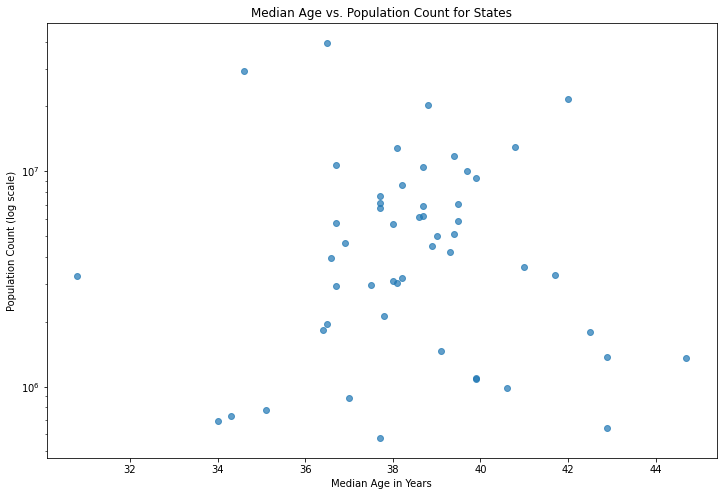

In [ ]:
# Generate the plot for state data
plot_data('Median Age vs. Population Count for States', df_state)

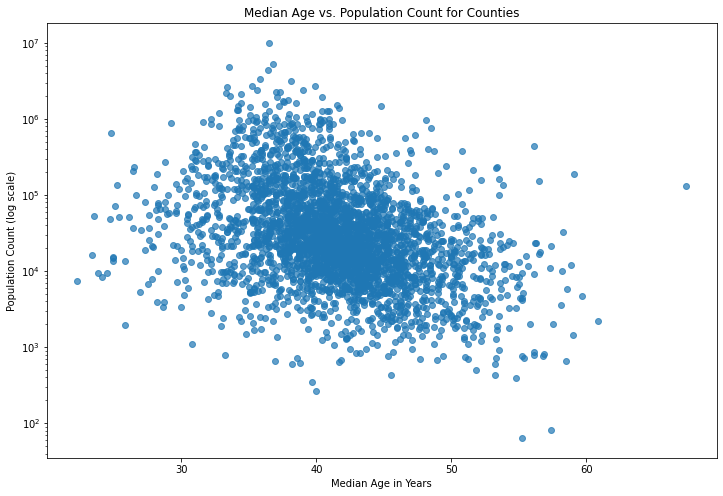

In [ ]:
# Generate the plot for county data
plot_data('Median Age vs. Population Count for Counties', df_county)

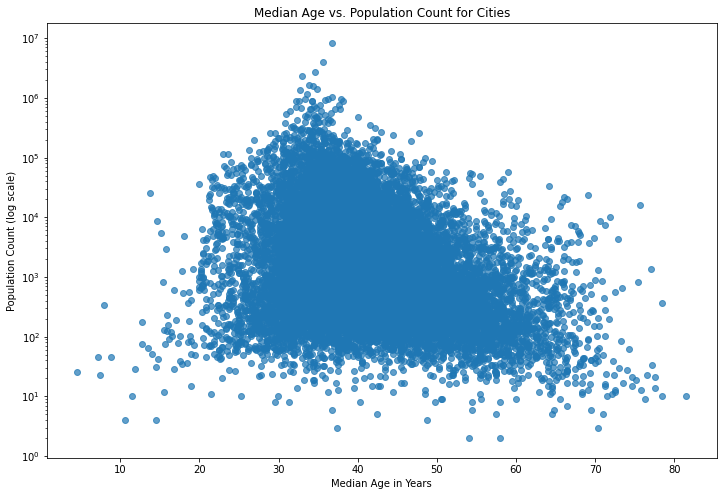

In [ ]:
# Generate the plot for city data
plot_data('Median Age vs. Population Count for Cities', df_city)

We can also plot each administrative area granularity on the same plot to see how they relate.

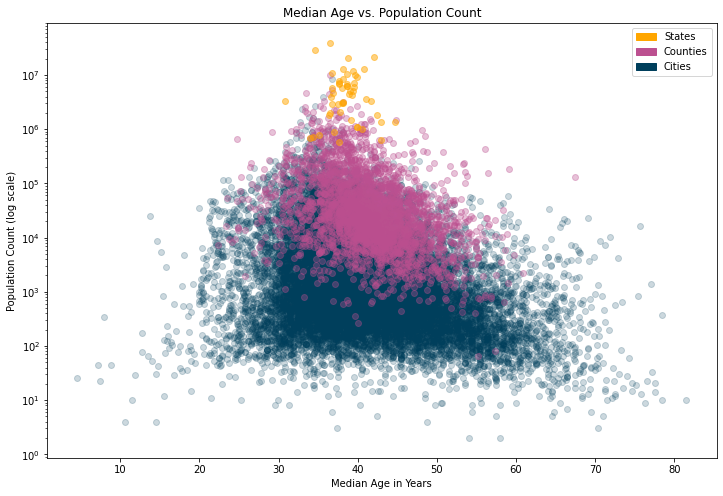

In [ ]:
def plot_all_data(state_table, county_table, city_table):
  plt.figure(figsize=(12, 8))
  plt.title('Median Age vs. Population Count')
  plt.xlabel('Median Age in Years')
  plt.ylabel('Population Count (log scale)')
  
  # Make things pretty
  state_color = "#ffa600"
  county_color = "#bc5090"
  city_color = "#003f5c"
  
  # Scatter plot the information
  ax = plt.gca()
  ax.set_yscale('log')
  ax.scatter(city_table['Median_Age_Person'], city_table['Count_Person'], color=city_color, alpha=0.20)
  ax.scatter(county_table['Median_Age_Person'], county_table['Count_Person'], color=county_color, alpha=0.35)
  
  ax.scatter(state_table['Median_Age_Person'], state_table['Count_Person'], color=state_color, alpha=0.50)
  
  # Create the legend
  state_patch = mpatches.Patch(color=state_color, label='States')
  county_patch = mpatches.Patch(color=county_color, label='Counties')
  city_patch = mpatches.Patch(color=city_color, label='Cities')
  plt.legend(handles=[state_patch, county_patch, city_patch])

# Plot all the data together.
plot_all_data(df_state, df_county, df_city)

## What's Next

Congratulations - you've completed your first Data Commons task! Now that you have completed the tutorial, you can explore the other Data Commons notebooks to get ideas for querying and joining data from the graph.